# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
  
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | kristiansund
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | baoning
Processing Record 5 of Set 1 | nantucket
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | tuatapere
Processing Record 9 of Set 1 | hay river
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | aklavik
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 17 of Set 1 | port-cartier
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | casa nova
Processing Record 20 of Set 1 | flinders
Processing Record 21 of Set 1 | guelavia
Ci

Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | port moresby
Processing Record 42 of Set 4 | saleaula
City not found. Skipping...
Processing Record 43 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 4 | cabadiangan
Processing Record 45 of Set 4 | souillac
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | kloulklubed
Processing Record 0 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 1 of Set 5 | olinda
Processing Record 2 of Set 5 | guna
Processing Record 3 of Set 5 | pisco
Processing Record 4 of Set 5 | namatanai
Processing Record 5 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 5 | avarua
Processing Record 7 of Set 5 | valley city
Processing Record 8 of Set 5 | santa h

Processing Record 27 of Set 8 | buritis
Processing Record 28 of Set 8 | semnan
Processing Record 29 of Set 8 | korla
Processing Record 30 of Set 8 | tigre
Processing Record 31 of Set 8 | vila velha
Processing Record 32 of Set 8 | bengkulu
Processing Record 33 of Set 8 | grants pass
Processing Record 34 of Set 8 | honiara
Processing Record 35 of Set 8 | san carlos de bariloche
Processing Record 36 of Set 8 | kadykchan
City not found. Skipping...
Processing Record 37 of Set 8 | itanhandu
Processing Record 38 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 39 of Set 8 | khormuj
City not found. Skipping...
Processing Record 40 of Set 8 | jiangyou
Processing Record 41 of Set 8 | salinas
Processing Record 42 of Set 8 | karaul
City not found. Skipping...
Processing Record 43 of Set 8 | mastic beach
Processing Record 44 of Set 8 | isangel
Processing Record 45 of Set 8 | matay
Processing Record 46 of Set 8 | ancud
Processing Record 47 of Set 8 | robertsport
Processing Record 4

Processing Record 12 of Set 12 | mweka
Processing Record 13 of Set 12 | gigmoto
Processing Record 14 of Set 12 | haines junction
Processing Record 15 of Set 12 | arrifes
Processing Record 16 of Set 12 | payo
Processing Record 17 of Set 12 | san lorenzo de el escorial
Processing Record 18 of Set 12 | kiruna
Processing Record 19 of Set 12 | coquimbo
Processing Record 20 of Set 12 | biltine
Processing Record 21 of Set 12 | menongue
Processing Record 22 of Set 12 | tonekabon
Processing Record 23 of Set 12 | hunza
City not found. Skipping...
Processing Record 24 of Set 12 | khorixas
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | paamiut
Processing Record 27 of Set 12 | karratha
Processing Record 28 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 29 of Set 12 | olafsvik
Processing Record 30 of Set 12 | najran
Processing Record 31 of Set 12 | temaraia
City not found. Skipping...
Processing Record 32 of Set 12 | lanas
Processing Record 33 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          538
Lat           538
Lng           538
Max Temp      538
Humidity      538
Cloudiness    538
Wind Speed    538
Country       538
Date          538
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,27.50,77,15,9.03,KI,1674026424
1,kristiansund,63.1115,7.7320,0.36,69,20,1.03,NO,1674026424
2,tuktoyaktuk,69.4541,-133.0374,-23.04,99,100,3.45,CA,1674026424
3,baoning,25.3378,110.0260,10.92,24,75,2.00,CN,1674026424
4,nantucket,41.2835,-70.0995,6.19,87,100,4.63,US,1674026424


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.50,77,15,9.03,KI,1674026424
1,kristiansund,63.1115,7.7320,0.36,69,20,1.03,NO,1674026424
2,tuktoyaktuk,69.4541,-133.0374,-23.04,99,100,3.45,CA,1674026424
3,baoning,25.3378,110.0260,10.92,24,75,2.00,CN,1674026424
4,nantucket,41.2835,-70.0995,6.19,87,100,4.63,US,1674026424


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

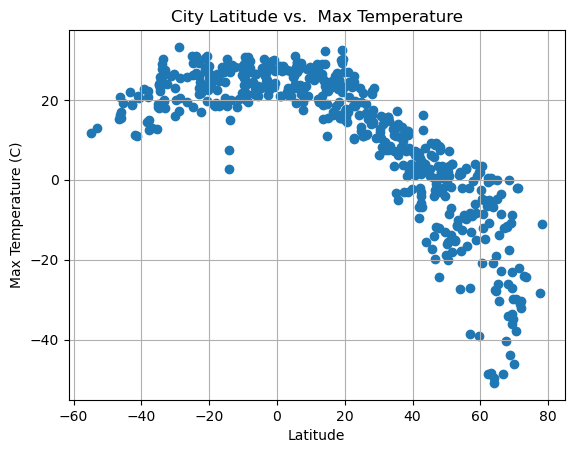

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs.  Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

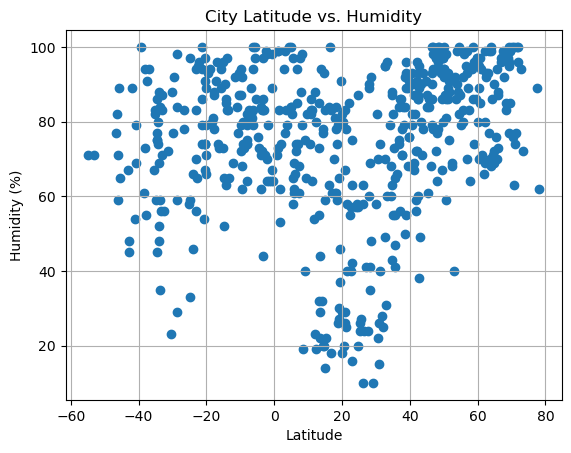

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

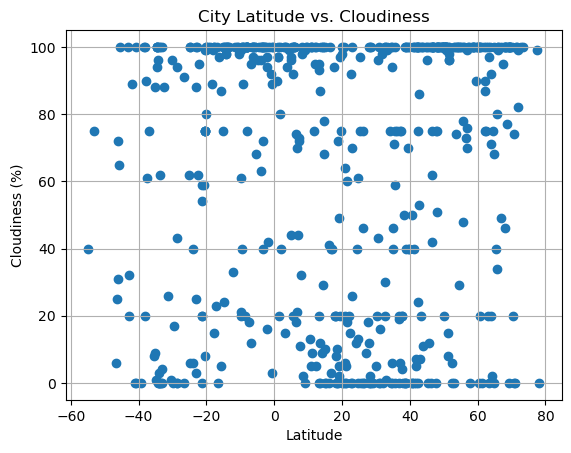

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

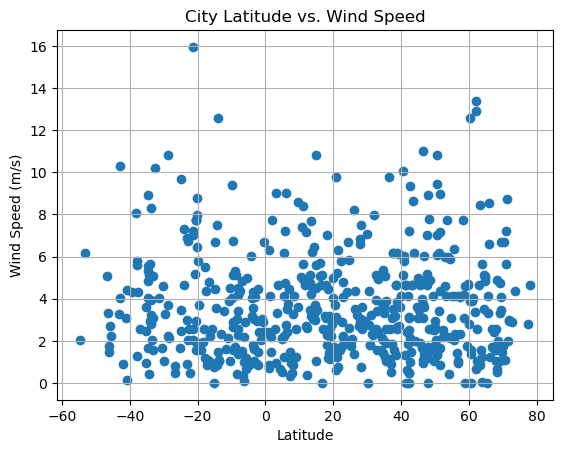

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,butaritari,3.0707,172.7902,27.50,77,15,9.03,KI,1674026424
1,kristiansund,63.1115,7.7320,0.36,69,20,1.03,NO,1674026424
2,tuktoyaktuk,69.4541,-133.0374,-23.04,99,100,3.45,CA,1674026424
3,baoning,25.3378,110.0260,10.92,24,75,2.00,CN,1674026424
4,nantucket,41.2835,-70.0995,6.19,87,100,4.63,US,1674026424


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,hermanus,-34.4187,19.2345,24.33,80,96,0.43,ZA,1674026425
7,tuatapere,-46.1333,167.6833,17.07,71,72,1.47,NZ,1674026425
9,rikitea,-23.1203,-134.9692,25.86,70,25,2.98,PF,1674026426
10,arraial do cabo,-22.9661,-42.0278,23.03,94,3,6.89,BR,1674026426
12,new norfolk,-42.7826,147.0587,18.73,45,32,4.02,AU,1674026427


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.869999929835958


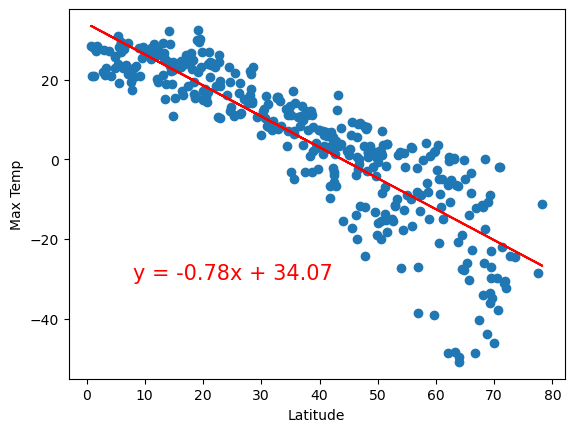

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,-30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.4392856745338457


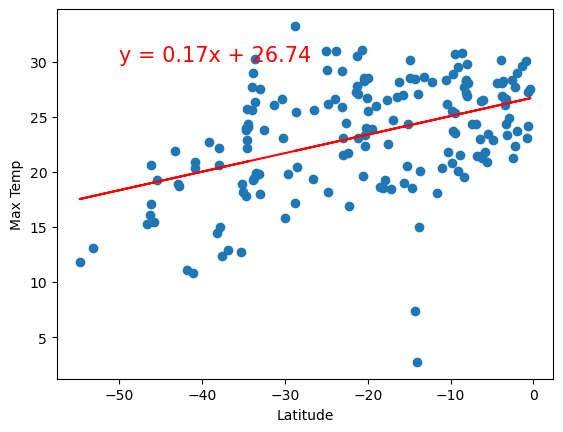

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** On Northern Hemisphere, Max Temparature has a strong negative correlation with Latitude (r value = -0.86). On Southern Hemisphere, Max Temprature has a week positive correlation with Latitude (r-value is 0.44).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4048919478233705


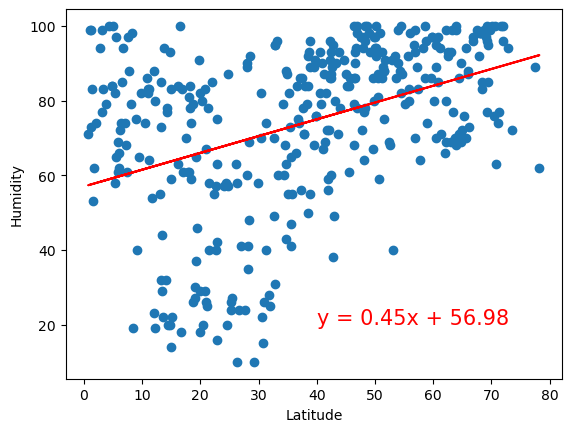

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.23805553405087887


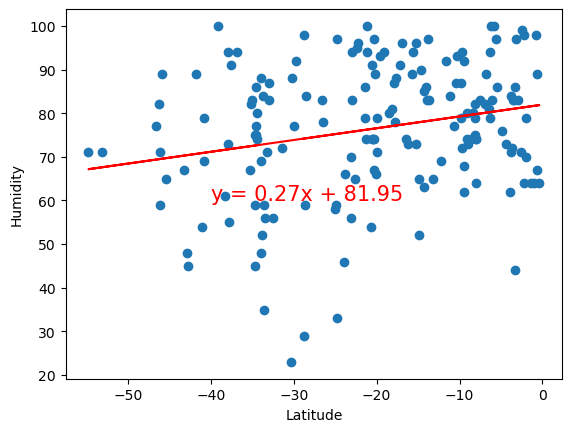

In [32]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** On Northern Hemisphere, Humidity has a weak positive correlation with Latitude (r value = 0.4). On Southern Hemisphere, Max Temprature does not have a clear positive correlation with Latitude (r-value is 0.23).

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20931865591874613


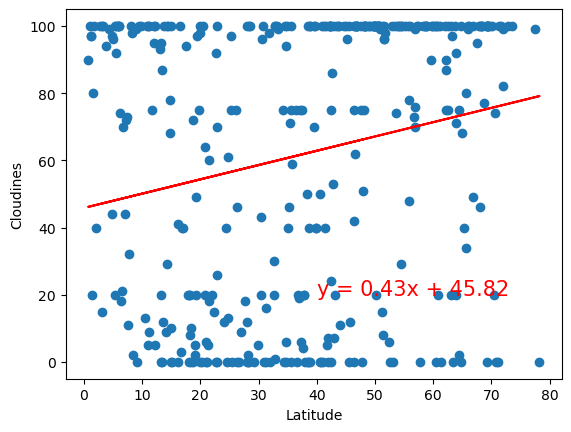

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudines")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.34866707694615945


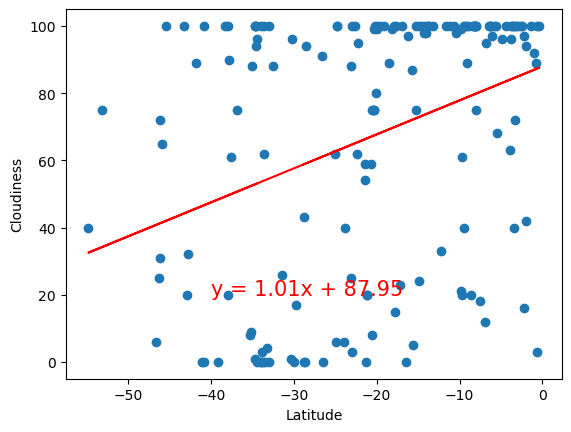

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** On both Northern Hemisphere and Southern Hemisphere, Cloudiness has very weak positive correlation with Latitude (r value is 0.20 and 0.34 relatively)

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.007878584844595497


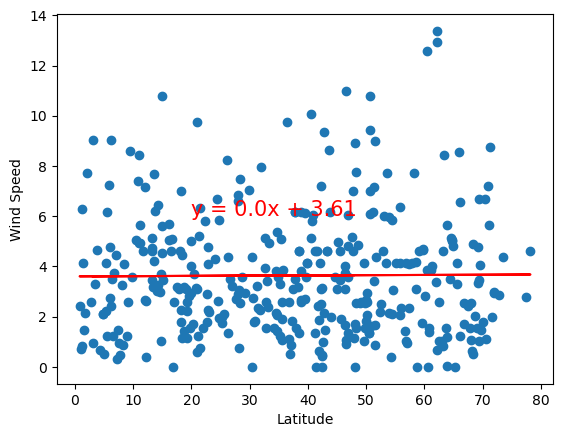

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.15048643540563647


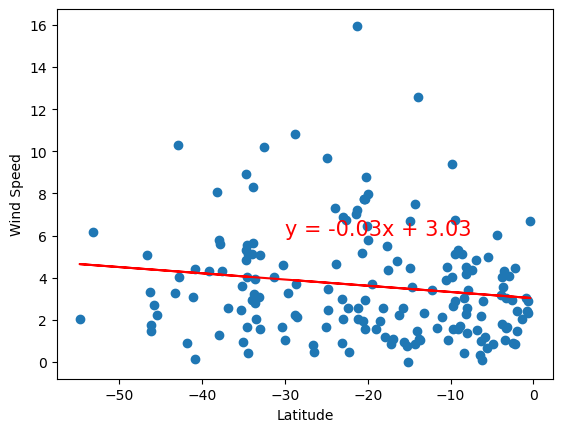

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,6),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:**  On both Northern Hemisphere and Southern Hemisphere, Wind Speed has no correlation with Latitude (r values are close to 0; they are 0.007 and -0.15 relatively)